In [2]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping


mat = loadmat('image_afib.mat')
matNormal = loadmat('image_normal2')

In [3]:
#mat

In [4]:
matData = mat['image_afib']
matDataNormal = matNormal['image_normal2']

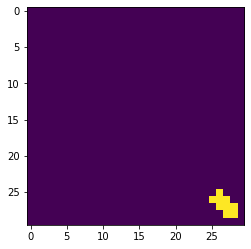

In [5]:
plt.imshow(matDataNormal[:,:,0])
matDataReshapedNormal = np.swapaxes(matDataNormal,1,2)
matDataReshapedNormal = np.swapaxes(matDataReshapedNormal,0,1)

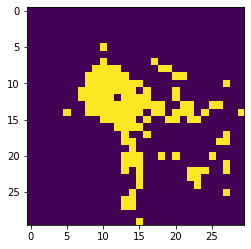

In [6]:
plt.imshow(matData[:,:,0])

In [7]:
matDataReshaped = np.swapaxes(matData,1,2)
matDataReshaped = np.swapaxes(matDataReshaped,0,1)

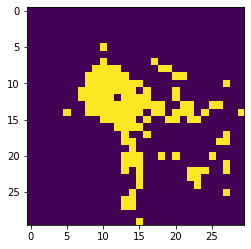

In [8]:
plt.imshow(matDataReshaped[0,:,:])

In [9]:
matDataReshaped.shape

(195, 30, 30)

In [10]:
type(matData)

numpy.ndarray

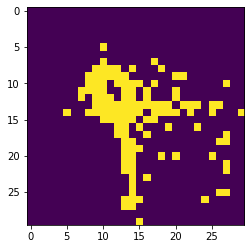

In [11]:
plt.imshow(matData[:,:,1])

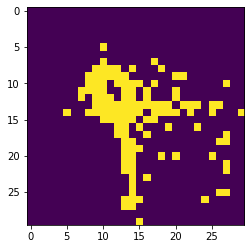

In [12]:
plt.imshow(matDataReshaped[1])

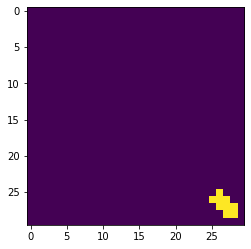

In [13]:
plt.imshow(matDataReshapedNormal[0])

In [14]:
heartData = np.concatenate((matDataReshaped, matDataReshapedNormal), axis=0)

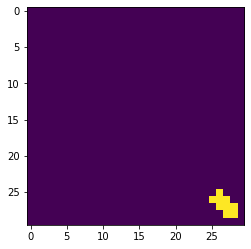

In [15]:
plt.imshow(heartData[195])

In [16]:
yTrue = np.ones((matDataReshaped.shape[0]), dtype=int)

In [17]:
yFalse = np.zeros((matDataReshapedNormal.shape[0]), dtype=int)

In [18]:
y = np.concatenate((yTrue,yFalse), axis=0)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(heartData, y, test_size=0.25, random_state=101)

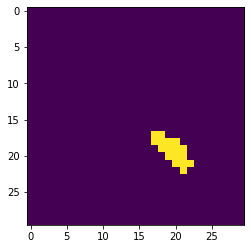

In [20]:
plt.imshow(X_train[5])

In [26]:
y_train

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0])

In [27]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(30, 30, 1), activation='relu',))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# 128 Neuron Fully Connected Layer
model.add(Dense(128, activation='relu'))

# Binary Output
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Recall()])

In [28]:
X_train.shape

(292, 30, 30)

In [29]:
X_train = X_train.reshape(292, 30, 30, 1)

In [30]:
X_test.shape

(98, 30, 30)

In [31]:
X_test = X_test.reshape(98, 30, 30, 1)

In [32]:
X_test.shape

(98, 30, 30, 1)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [35]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 292 samples, validate on 98 samples
Epoch 1/100
292/292 [==============================] - 1s 2ms/sample - loss: 0.3319 - accuracy: 0.9007 - recall: 0.9583 - val_loss: 0.1203 - val_accuracy: 0.9694 - val_recall: 1.0000
Epoch 2/100
292/292 [==============================] - 0s 298us/sample - loss: 0.0769 - accuracy: 0.9795 - recall: 0.9792 - val_loss: 0.0624 - val_accuracy: 0.9694 - val_recall: 1.0000
Epoch 3/100
292/292 [==============================] - 0s 298us/sample - loss: 0.0278 - accuracy: 0.9932 - recall: 0.9931 - val_loss: 0.0351 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 4/100
292/292 [==============================] - 0s 305us/sample - loss: 0.0136 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0207 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 5/100
292/292 [==============================] - 0s 308us/sample - loss: 0.0074 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 6/100
292/292 [===========

In [36]:
losses = pd.DataFrame(model.history.history)

In [37]:
losses.head()

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.331934,0.900685,0.958333,0.120268,0.969388,1.0
1,0.076904,0.979452,0.979167,0.062398,0.969388,1.0
2,0.027804,0.993151,0.993056,0.035130,1.000000,1.0
3,0.013586,1.000000,1.000000,0.020684,1.000000,1.0
4,0.007357,1.000000,1.000000,0.015806,1.000000,1.0


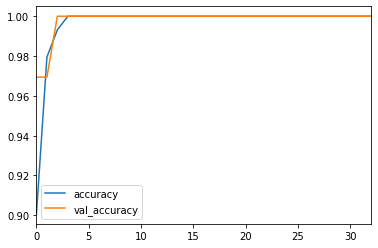

In [38]:
losses[['accuracy','val_accuracy']].plot()

In [39]:
type(losses)

pandas.core.frame.DataFrame

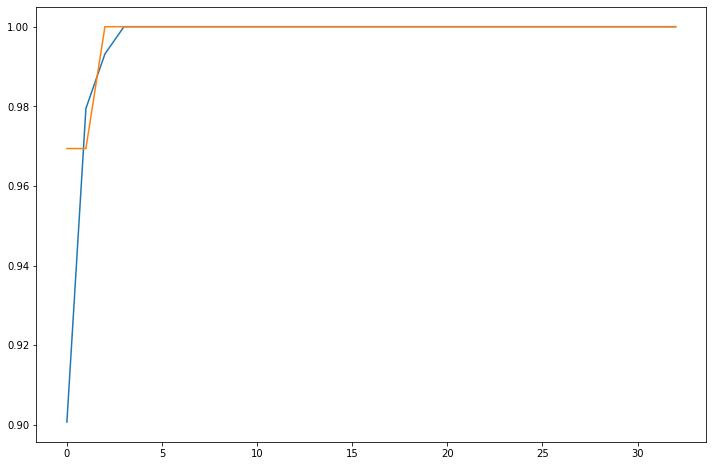

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(losses[['accuracy','val_accuracy']])

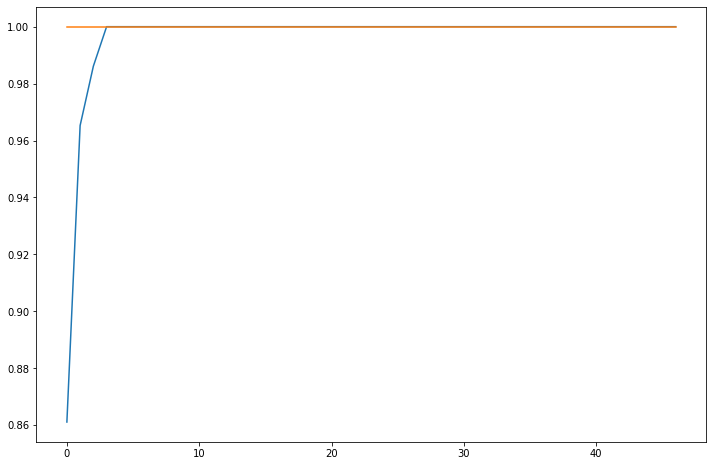

In [58]:
plt.figure(figsize=(12, 8))
plt.plot(losses[['recall','val_recall']])

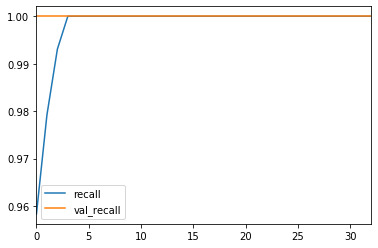

In [42]:
losses[['recall','val_recall']].plot()

[]